In [59]:
import os
import pandas as pd
from yaml import safe_load

# Dossier contenant les runs MLflow (expérience 0)
mlruns_path = "mlruns/0"

# Liste pour stocker les données combinées
combined_data = []

# Parcours des sous-dossiers de runs
for run_id in os.listdir(mlruns_path):
    run_dir = os.path.join(mlruns_path, run_id)
    if not os.path.isdir(run_dir):
        continue

    # Dictionnaire pour stocker les données de ce run
    run_data = {"run_id": run_id}

    # Récupération des params
    params_path = os.path.join(run_dir, "params")
    if os.path.exists(params_path):
        for param_file in os.listdir(params_path):
            with open(os.path.join(params_path, param_file), "r") as f:
                value = f.read().strip()
                run_data[param_file] = value  # clé = nom du paramètre

    # Récupération des metrics (dernière valeur de chaque métrique)
    metrics_path = os.path.join(run_dir, "metrics")
    if os.path.exists(metrics_path):
        for metric_file in os.listdir(metrics_path):
            with open(os.path.join(metrics_path, metric_file), "r") as f:
                lines = [line.strip() for line in f if line.strip()]
                if lines:
                    # Format: step timestamp value (on prend la dernière ligne)
                    last_value = float(lines[-1].split(" ")[1])
                    run_data[metric_file] = last_value  # clé = nom de la métrique

    combined_data.append(run_data)

# Création du DataFrame combiné
combined_df = pd.DataFrame(combined_data)


combined_df

,run_id,beta,unlearn_method,unlearn,unlearn_lr,quantile,num_indexes_to_replace,unlearn_epochs,model,save_dir,...,MIA_prob,MIA_correctness,MIA_m_entropy,Fid,RTE,forget,relativeUA,MIA_entropy,retain,val
0,ca2009ea796a44708eda8b4ce6685afa,0.9,ideal,ideal,0.1,0.5,450,120,./results/cifar100/1vgg16_bn_ep120model_SA_bes...,./results/cifar100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e82c951e94d24ac687847ce59cd3996f,0.95,NaN,SalGrad,0.0001,0.5,2250,7,./results/cifar10/0_cifar10_resnet18_5model.pt...,./results/cifar10,...,0.257333,0.306667,0.181333,71.79,25.182767,30.666667,6.45,0.161778,87.789474,82.06
2,6f67d53e3f1b415e86e0a7a36e39f6cb,0.95,NaN,NGPlus,0.0001,0.5,4500,5,./results/cifar10/-1_cifar10_resnet18_2model.p...,./results/cifar10,...,0.946444,0.983556,0.878444,76.42,3.431024,98.355556,17.05,0.895778,98.409877,93.26
3,bd2f02afd5284e9da2220d1f83f7bda8,0.95,NaN,NGPlus,0.0001,0.5,2250,2,./results/cifar10/-1_cifar10_resnet18_4model.p...,./results/cifar10,...,0.870222,0.989778,0.891111,77.33,0.628638,98.977778,16.51,0.905333,98.669006,93.60
4,a62c45c71bad435b9a94c52f86aea814,0.95,NaN,NGPlus,0.0001,0.5,4500,7,./results/cifar10/-1_cifar10_resnet18_2model.p...,./results/cifar10,...,0.943556,0.985111,0.880000,76.37,3.433674,98.511111,17.15,0.896444,98.476543,93.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,f1d8e1fadb0748a093bab63497ea7ed0,0.95,NaN,SalGrad,0.0001,0.5,4500,10,./results/cifar10/-1_cifar10_resnet18_2model.p...,./results/cifar10,...,0.955778,0.977778,0.892444,76.67,63.920140,97.777778,17.45,0.908000,98.977778,94.72
199,5599821da87d4696973e551186c1b7f2,0.95,NaN,SalGrad,0.0001,0.5,2250,2,./results/cifar10/-1_cifar10_resnet18_2model.p...,./results/cifar10,...,0.780000,0.984889,0.892444,76.51,33.462992,98.488889,17.02,0.909333,98.720468,93.70
200,c1015eb7c59e4245b7c1d699573d7f66,0.95,NaN,VarGrad,0.0001,0.5,2250,8,./results/cifar10/-1_cifar10_resnet18_2model.p...,./results/cifar10,...,0.761333,0.914667,0.890667,NaN,52.625352,91.466667,NaN,0.891111,97.518129,92.24
201,8cebf77cef4742e3a99f9315c9ab56a4,0.95,NaN,NGPlus,0.0001,0.5,2250,5,./results/cifar10/-1_cifar10_resnet18_2model.p...,./results/cifar10,...,0.945778,0.985333,0.873778,76.89,0.632985,98.533334,16.56,0.892444,98.332164,93.24


In [60]:
os.listdir(mlruns_path)

['ca2009ea796a44708eda8b4ce6685afa',
 'e82c951e94d24ac687847ce59cd3996f',
 '6f67d53e3f1b415e86e0a7a36e39f6cb',
 'bd2f02afd5284e9da2220d1f83f7bda8',
 'a62c45c71bad435b9a94c52f86aea814',
 'd15fcf4850db4834adf9ee4c2926d021',
 '7950661f437e437f85a1b53122c794a9',
 'a1107f4a9d744bfdbb18545fe9467628',
 'b9ad962a50384aa38e8227dc7e0e1c26',
 '102e6a322d85438089d0d1227afda040',
 '21fb404b308c46cd995e2e441c36e7bf',
 'f2c95f7e162640b1ba4154593c0c4612',
 '468ab4f947b840608898ddf3920f3e47',
 '6d0323a965b04f958799c6ec5af7968a',
 '28f86f853869425ba99739164fa718ce',
 'c686568812ac4ceebd5e33e628464940',
 'cb4be272dc8a4ff89145a728ddbd73e7',
 'acd8c66e62734ec49f385b218d9bf743',
 'd33c9cb0e7c64da6b8c2d696a1f0d11f',
 '0eda40d2828b49bbbcca049a63284b1d',
 '8c0ad50ff9bb47939dd5ad52165c5af8',
 '09ec4705371546d7b4a1a0ec327f0987',
 'c1e9ec581106416c9e7800ce2c70058e',
 'f1f017eff74a4ade83028da869eeb77f',
 '454ba67978a34740adb9e2f9db11d0e2',
 '512f79d0f7cb45a7a19db2f1e73e4c68',
 '5e12d4b785ce403c9bcd2ad5e79c3de2',
 

In [61]:
combined_df

,run_id,beta,unlearn_method,unlearn,unlearn_lr,quantile,num_indexes_to_replace,unlearn_epochs,model,save_dir,...,MIA_prob,MIA_correctness,MIA_m_entropy,Fid,RTE,forget,relativeUA,MIA_entropy,retain,val
0,ca2009ea796a44708eda8b4ce6685afa,0.9,ideal,ideal,0.1,0.5,450,120,./results/cifar100/1vgg16_bn_ep120model_SA_bes...,./results/cifar100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e82c951e94d24ac687847ce59cd3996f,0.95,NaN,SalGrad,0.0001,0.5,2250,7,./results/cifar10/0_cifar10_resnet18_5model.pt...,./results/cifar10,...,0.257333,0.306667,0.181333,71.79,25.182767,30.666667,6.45,0.161778,87.789474,82.06
2,6f67d53e3f1b415e86e0a7a36e39f6cb,0.95,NaN,NGPlus,0.0001,0.5,4500,5,./results/cifar10/-1_cifar10_resnet18_2model.p...,./results/cifar10,...,0.946444,0.983556,0.878444,76.42,3.431024,98.355556,17.05,0.895778,98.409877,93.26
3,bd2f02afd5284e9da2220d1f83f7bda8,0.95,NaN,NGPlus,0.0001,0.5,2250,2,./results/cifar10/-1_cifar10_resnet18_4model.p...,./results/cifar10,...,0.870222,0.989778,0.891111,77.33,0.628638,98.977778,16.51,0.905333,98.669006,93.60
4,a62c45c71bad435b9a94c52f86aea814,0.95,NaN,NGPlus,0.0001,0.5,4500,7,./results/cifar10/-1_cifar10_resnet18_2model.p...,./results/cifar10,...,0.943556,0.985111,0.880000,76.37,3.433674,98.511111,17.15,0.896444,98.476543,93.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,f1d8e1fadb0748a093bab63497ea7ed0,0.95,NaN,SalGrad,0.0001,0.5,4500,10,./results/cifar10/-1_cifar10_resnet18_2model.p...,./results/cifar10,...,0.955778,0.977778,0.892444,76.67,63.920140,97.777778,17.45,0.908000,98.977778,94.72
199,5599821da87d4696973e551186c1b7f2,0.95,NaN,SalGrad,0.0001,0.5,2250,2,./results/cifar10/-1_cifar10_resnet18_2model.p...,./results/cifar10,...,0.780000,0.984889,0.892444,76.51,33.462992,98.488889,17.02,0.909333,98.720468,93.70
200,c1015eb7c59e4245b7c1d699573d7f66,0.95,NaN,VarGrad,0.0001,0.5,2250,8,./results/cifar10/-1_cifar10_resnet18_2model.p...,./results/cifar10,...,0.761333,0.914667,0.890667,NaN,52.625352,91.466667,NaN,0.891111,97.518129,92.24
201,8cebf77cef4742e3a99f9315c9ab56a4,0.95,NaN,NGPlus,0.0001,0.5,2250,5,./results/cifar10/-1_cifar10_resnet18_2model.p...,./results/cifar10,...,0.945778,0.985333,0.873778,76.89,0.632985,98.533334,16.56,0.892444,98.332164,93.24


0


/var/folders/17/d5wm_d6x5zv68h4w18r3246h4xmqkj/T/ipykernel_89705/1710916865.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(methods))
/var/folders/17/d5wm_d6x5zv68h4w18r3246h4xmqkj/T/ipykernel_89705/1710916865.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))


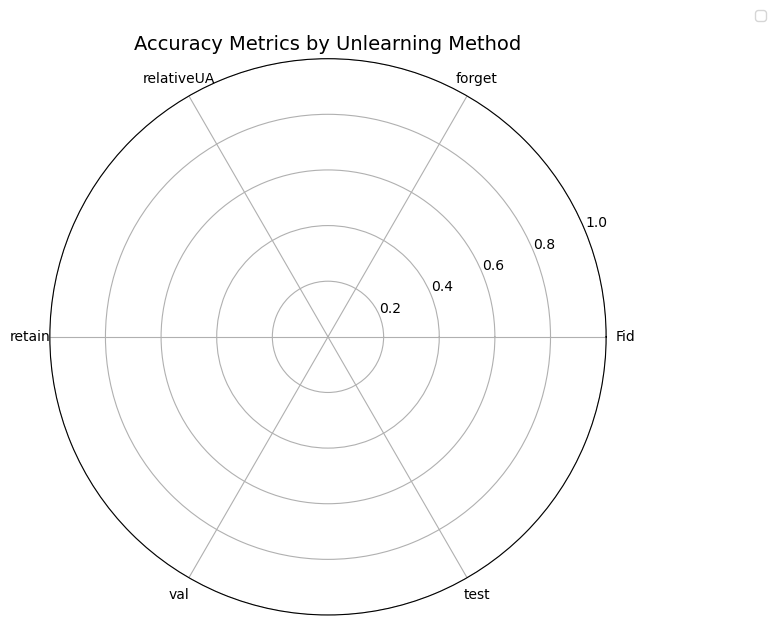

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = combined_df.copy()
df = df[(df["num_indexes_to_replace"] == "22500") & (df["unlearn_epochs"] != "10")]
df['relativeUA'] = 100 - df['relativeUA'].astype(float)
print(len(df))

# --- Étape 1 : sélectionner les colonnes d'accuracy ---
accuracy_cols = ['Fid','forget',
       'relativeUA', 'retain', 'val', 'test']
methods = df["unlearn"].unique()
methods = ["VarGrad", "SalGrad"]

# --- Étape 2 : calcul des moyennes par méthode ---
method_means = df.groupby("unlearn")[accuracy_cols].mean()

# --- Étape 3 : construction du radar plot ---
# Préparation des angles
labels = accuracy_cols
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # boucle fermée

# Style
plt.figure(figsize=(8, 8))
plt.subplot(111, polar=True)

# Couleurs pour les différentes méthodes
colors = plt.cm.get_cmap("tab10", len(methods))

# Tracer chaque méthode
for idx, method in enumerate(methods):
    try:
        values = method_means.loc[method].tolist()
        values += values[:1]  # boucle fermée
        plt.plot(angles, values, label=method, color=colors(idx))
        plt.fill(angles, values, alpha=0.5, color=colors(idx))
    except KeyError:
        print(f"Warning: Method '{method}' not found in the DataFrame.")

# Labels axes
plt.xticks(angles[:-1], labels)
plt.title("Accuracy Metrics by Unlearning Method", size=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


In [63]:
df

,run_id,beta,unlearn_method,unlearn,unlearn_lr,quantile,num_indexes_to_replace,unlearn_epochs,model,save_dir,...,MIA_prob,MIA_correctness,MIA_m_entropy,Fid,RTE,forget,relativeUA,MIA_entropy,retain,val


/var/folders/17/d5wm_d6x5zv68h4w18r3246h4xmqkj/T/ipykernel_89705/1973823807.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(methods))


KeyError: nan

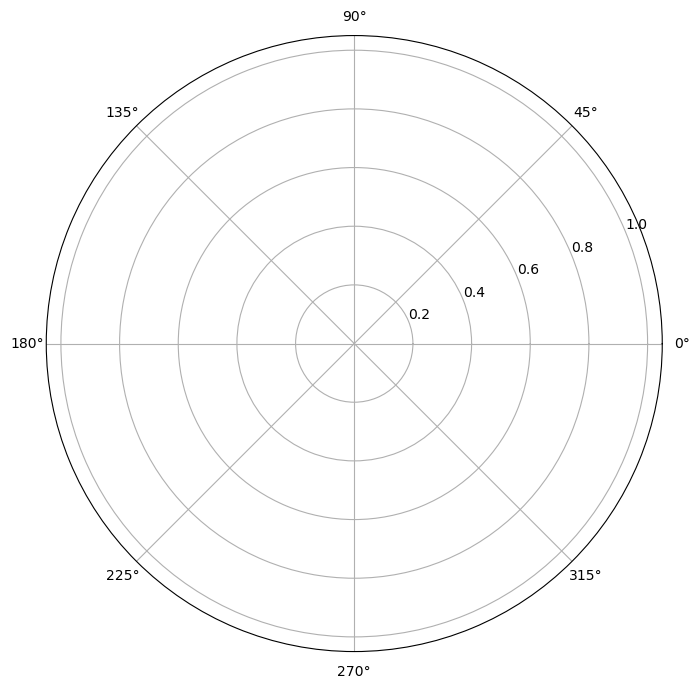

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Étape 1 : sélectionner les colonnes d'accuracy ---
accuracy_cols = ["val", "test", "forget", "retain"]
methods = combined_df["unlearn_method"].unique()

# --- Étape 2 : calcul des moyennes par méthode ---
method_means = combined_df.groupby("unlearn_method")[accuracy_cols].mean()

# --- Étape 3 : angles pour le radar plot ---
labels = accuracy_cols
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # boucle fermée

# --- Étape 4 : plot ---
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Couleurs
colors = plt.cm.get_cmap("tab10", len(methods))

# Tracer chaque méthode
for idx, method in enumerate(methods):
    values = method_means.loc[method].tolist()
    values += values[:1]  # boucle fermée
    ax.plot(angles, values, label=method, color=colors(idx))
    ax.fill(angles, values, alpha=0.25, color=colors(idx))

# --- Ajout de la courbe "random" ---
random_value = 10.0  # baseline à 10%
random_values = [random_value] * num_vars
random_values += random_values[:1]
ax.plot(angles, random_values, label="Random (10%)", color="black", linestyle="--")
ax.fill(angles, random_values, alpha=0.1, color="gray")

# --- Mise en forme ---
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title("Accuracy Metrics by Unlearning Method", size=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()
